## Cost Function

Goal: Implement and explore the cost function with one variable

In [1]:
#!pip install lab-utils 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#from lab_utils_uni import plt_intuitions, plt_stationary, plt_update_onclick, soup_bowl
import seaborn as sns
sns.set_style('darkgrid')

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [6]:
# size in 1k's sqrft and price in 1k's of USD
x_train = np.array([1.,2.])
y_train = np.array([300.,500,])

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [7]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for a linear expression.
    Args:
        x (ndarray (m,)): Data, m examples 
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters  
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression to the fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

### Cost Function Intuition

Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

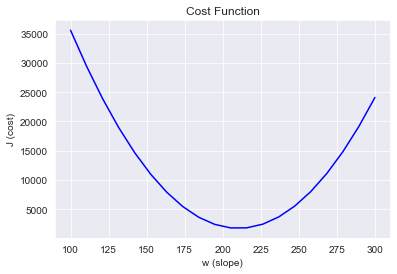

In [48]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730,])


# Experimenting
w_list = np.linspace(100, 300, 20)
b = 0

cost_func_y = np.zeros(w_list.shape[0]) 
for i, w in enumerate(w_list):
    cost_func_y[i] = compute_cost(x_train, y_train, w, b)
    
plt.plot(w_list, cost_func_y, c='b')    
    

plt.title('Cost Function')
plt.ylabel('J (cost)')
plt.xlabel('w (slope)')

plt.show()

In this simplified cost function where b = 0, we see that w is minimized at a little over 200. 

### Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric, was shown in lecture: